In [227]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from enum import Enum
import statsmodels.api as sm
import math
from scipy.stats import norm
import seaborn as sb

In [179]:
# reading data
#db available at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
db_filename = 'adult.data'

# to ensure that we don't hardcode the filter values.
class FilterValuesEnum(Enum):
    NotApplicableValue="?"
    LessThanFiftySalaryString="<=50K"
    MoreThanFiftySalaryString=">50K"
    ColumnSeperatorValue=","

#to ensure we don't make any mistakes while using column names
# More info about column names in https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
class ColumnNames(Enum):
    Age='Age'
    WorkClass='WorkClass'
    FinalWeight='Final Weight'
    Education='Education'
    EducationNum='Education-Num'
    MaritalStatus='Marital-Status'
    Occupation='Occupation'
    Relationship='Relationship'
    Race='Race'
    Sex='Sex'
    CapitalGain='Capital-Gain'
    CapitalLoss='Capital-Loss'
    HoursPerWeek='Hours Per Week'
    CountryOfOrigin='Country of Origin'
    SalaryFigure='Salary Figure'
    SalaryMoreThanFifty='Is Salary More than Fifty Thousand'
    SalaryLessThanFifty='Is Salary Less than Fifty Thousand'

column_Names = [columnName.value for columnName in ColumnNames]
missing_values = [FilterValuesEnum.NotApplicableValue.value]
actualDataFrame = pd.read_csv(db_filename, sep=FilterValuesEnum.ColumnSeperatorValue.value, names=column_Names, na_values=missing_values, skipinitialspace = True)
actualDataFrame[ColumnNames.SalaryLessThanFifty.value] = actualDataFrame[ColumnNames.SalaryFigure.value] == FilterValuesEnum.LessThanFiftySalaryString.value
actualDataFrame[ColumnNames.SalaryMoreThanFifty.value] = actualDataFrame[ColumnNames.SalaryFigure.value] == FilterValuesEnum.MoreThanFiftySalaryString.value
numberOfRows = len(actualDataFrame)
print(actualDataFrame.loc[13])

Age                                              32
WorkClass                                   Private
Final Weight                                 205019
Education                                Assoc-acdm
Education-Num                                    12
Marital-Status                        Never-married
Occupation                                    Sales
Relationship                          Not-in-family
Race                                          Black
Sex                                            Male
Capital-Gain                                      0
Capital-Loss                                      0
Hours Per Week                                   50
Country of Origin                     United-States
Salary Figure                                 <=50K
Is Salary More than Fifty Thousand            False
Is Salary Less than Fifty Thousand             True
Name: 13, dtype: object


In [180]:
# Inferring which columns have ?, NAN values
print(actualDataFrame.loc[14])
# print(actualDataFrame['Salary Figure'][0])
# print(type(actualDataFrame['Salary Figure'][0]))
# print(actualDataFrame['Salary Figure'] == ' <=50K')
#print('?' in actualDataFrame.loc[27]['WorkClass'])
#print(actualDataFrame['WorkClass'].str[1].contains(' \?'))
#questionValue = actualDataFrame['WorkClass']
#print((actualDataFrame['WorkClass'] != ' ?'))
#print(len(list(filter(lambda x: x == False, questionValue))))
#.str.contains('?')
#print(questionValue)
#print(questionValue.str[0])
# questionFrame = actualDataFrame['WorkClass'].str.replace(" ","").str.contains('?')
# trueList = list(filter(lambda x: x == True, questionFrame))
#print(len(trueList))
#print(actualDataFrame.loc[[2,3]])
#print(actualDataFrame.tail())
#print(actualDataFrame.head())
# print(actualDataFrame.loc[[0]])
# print(actualDataFrame.loc[0][2])
# print(type(actualDataFrame['WorkClass'][0]))
# print(actualDataFrame['WorkClass'])
#print(actualDataFrame.loc[actualDataFrame['WorkClass']])
# slt = actualDataFrame['WorkClass'].str == '?'
# print(slt)
#print(actualDataFrame['WorkClass'].isnull())
# for indexValue, individualColumn in enumerate(column_Names):
#     print("index value: + {1} + {0}".format(type(actualDataFrame.loc[0][individualColumn]), str(indexValue)))
#     #print(individualColumn)
    #print(actualDataFrame[individualColumn])
    #print(actualDataFrame.loc[actualDataFrame[individualColumn] == '?'])
#    print(type(actualDataFrame[[0]])
#     doesUnknowValuesExistForThisColumn = (actualDataFrame.loc[actualDataFrame[individualColumn].str.contains(pat = '*?*', regex = True)]).empty
#     if not doesUnknowValuesExistForThisColumn:
#         print('{0} has empty values'.format(individualColumn))

Age                                                   40
WorkClass                                        Private
Final Weight                                      121772
Education                                      Assoc-voc
Education-Num                                         11
Marital-Status                        Married-civ-spouse
Occupation                                  Craft-repair
Relationship                                     Husband
Race                                  Asian-Pac-Islander
Sex                                                 Male
Capital-Gain                                           0
Capital-Loss                                           0
Hours Per Week                                        40
Country of Origin                                    NaN
Salary Figure                                       >50K
Is Salary More than Fifty Thousand                  True
Is Salary Less than Fifty Thousand                 False
Name: 14, dtype: object


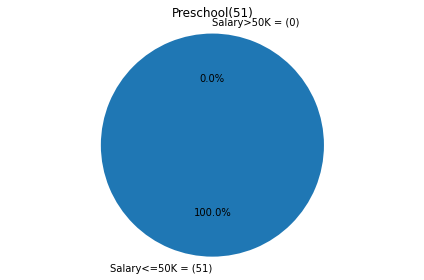

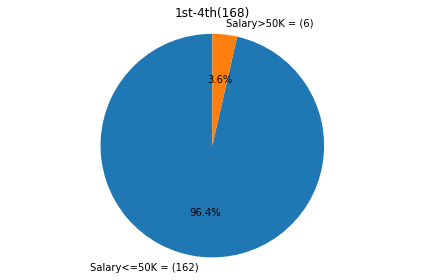

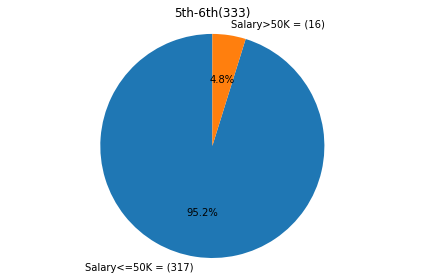

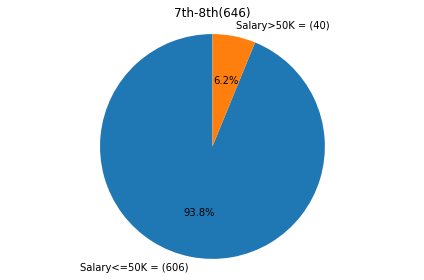

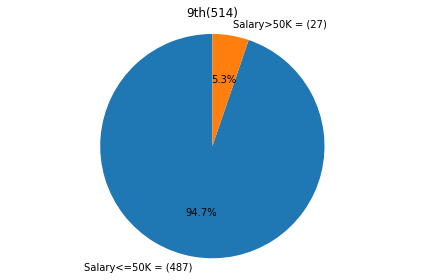

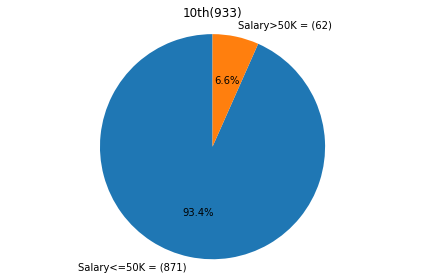

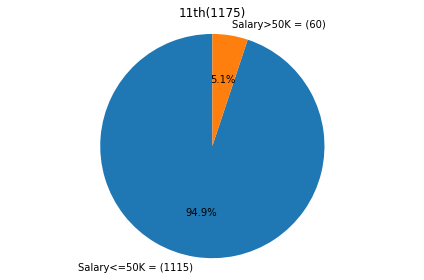

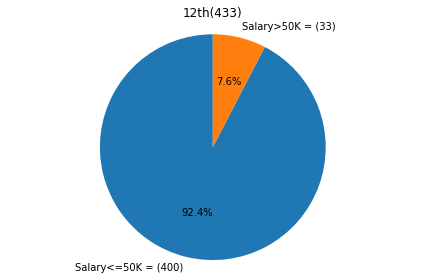

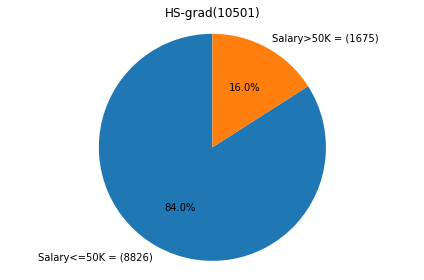

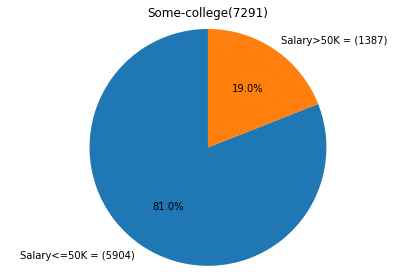

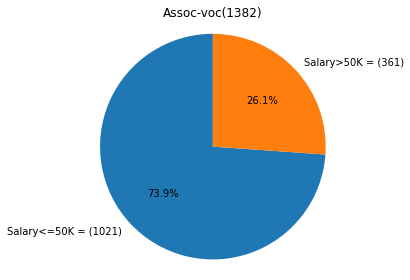

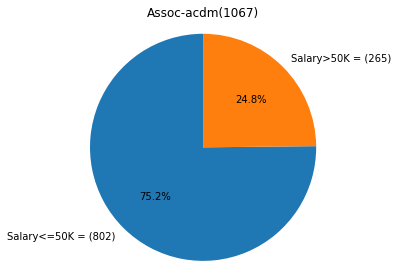

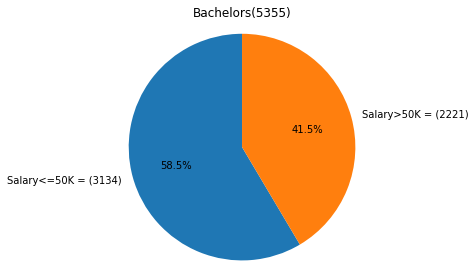

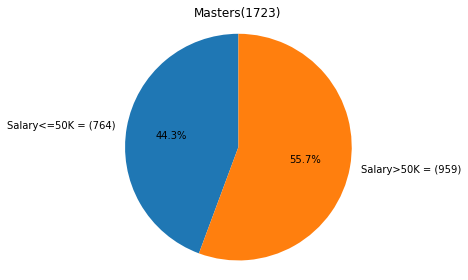

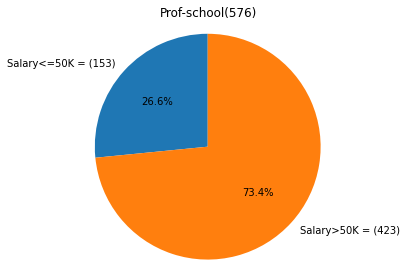

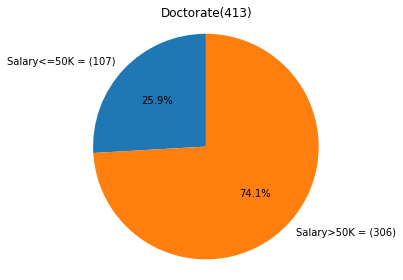

In [220]:
#pie chart for all signs
# print(actualDataFrame[ColumnNames.Education.value])
#print(actualDataFrame.loc[actualDataFrame[ColumnNames.Education.value] == 'Bachelors'])
# print(((actualDataFrame[ColumnNames.Education.value]=='Bachelors')[0:numberOfRows] == True))
#print(actualDataFrame.loc[(actualDataFrame[ColumnNames.Education.value] == 'Bachelors') & (actualDataFrame[ColumnNames.SalaryLessThanFifty.value] == False)])
actualDataFrame = actualDataFrame.sort_values(by=[ColumnNames.EducationNum.value])
uniqueEducationValues = actualDataFrame[ColumnNames.Education.value].unique()
pieLabels = ['Salary<=50K', 'Salary>50K']
educationSalaryValues = {}
educationSalaryComplementaryValues = {}

for differentEducationValues in uniqueEducationValues:
    educationSalaryValues.setdefault(differentEducationValues, 0)
    educationSpecificData = actualDataFrame.loc[actualDataFrame[ColumnNames.Education.value] == differentEducationValues]
    individualEducationCountLessThanFiftyK = len(educationSpecificData.loc[educationSpecificData[ColumnNames.SalaryLessThanFifty.value] == True])
    educationSalaryValues[differentEducationValues] = individualEducationCountLessThanFiftyK
    educationSalaryComplementaryValues[differentEducationValues] = len(educationSpecificData)-individualEducationCountLessThanFiftyK
    educationSalaryBothValues = [individualEducationCountLessThanFiftyK, len(educationSpecificData)-individualEducationCountLessThanFiftyK]
    educationSpecificPieLabels = [pieLabel+' = ('+str(eduSalaryValue)+')' for pieLabel,eduSalaryValue in zip(pieLabels, educationSalaryBothValues)]
    fig,ax = plt.subplots()
    
    patches, texts, autotexts = ax.pie(educationSalaryBothValues, labels=educationSpecificPieLabels, autopct='%1.1f%%', startangle=90, shadow=False)
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('black')
    ax.axis('equal') 
    ax.set_title('{0}({1})'.format(differentEducationValues, reduce(lambda x,y: x+y, educationSalaryBothValues)))
    plt.tight_layout()
    plt.show()

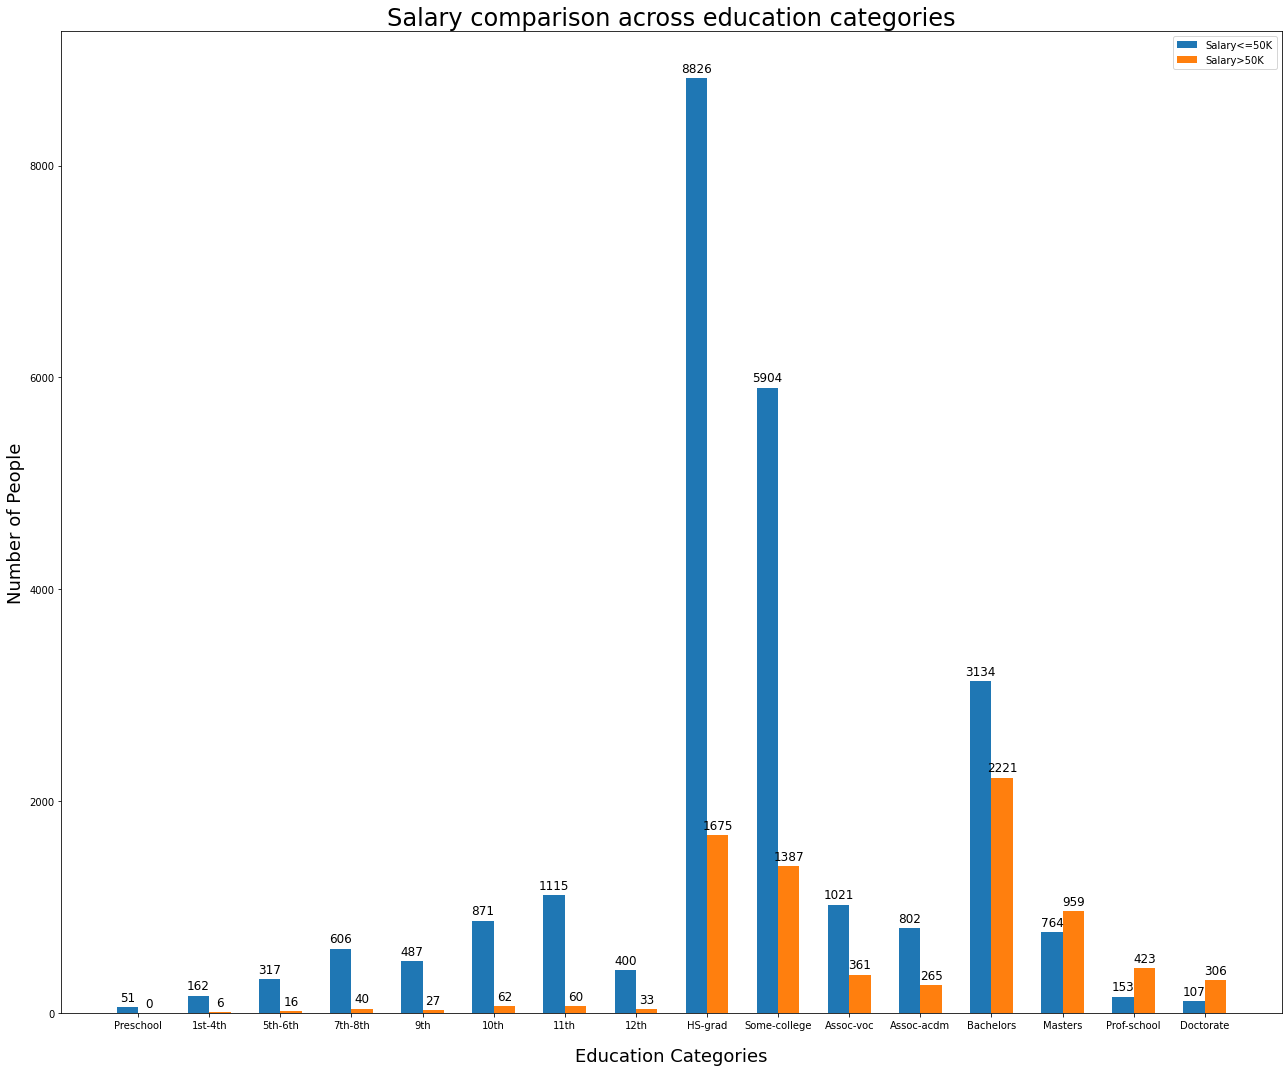

In [221]:
#stacked bar chart for each education category vs (Salary <=50k, Salary>50k)
labels = [x for x in educationSalaryComplementaryValues.keys()]
salLessThanFifty = [x for x in educationSalaryValues.values()]
salMoreThanFifty = [x for x in educationSalaryComplementaryValues.values()]

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(18, 15))
rects1 = ax.bar(x - width/2, salLessThanFifty, width, label='Salary<=50K')
rects2 = ax.bar(x + width/2, salMoreThanFifty, width, label='Salary>50K')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Education Categories', fontsize=18, labelpad=17)
ax.set_ylabel('Number of People', fontsize=18)
ax.set_title('Salary comparison across education categories', fontsize=24)
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3, fontsize=12)
ax.bar_label(rects2, padding=3, fontsize=12)

fig.tight_layout()

plt.show()

In [223]:
#creating data for education num category against salary.
uniqueEducationNumValues = actualDataFrame[ColumnNames.EducationNum.value].unique()
educationNumSalaryValues = {}
educationNumSalaryComplementaryValues = {}

for differentEducationNumValues in uniqueEducationNumValues:
    educationNumSalaryValues.setdefault(differentEducationNumValues, 0)
    educationNumSpecificData = actualDataFrame.loc[actualDataFrame[ColumnNames.EducationNum.value] == differentEducationNumValues]
    individualEducationNumCountLessThanFiftyK = len(educationNumSpecificData.loc[educationNumSpecificData[ColumnNames.SalaryLessThanFifty.value] == True])
    educationNumSalaryValues[differentEducationNumValues] = individualEducationNumCountLessThanFiftyK
    educationNumSalaryComplementaryValues[differentEducationNumValues] = len(educationNumSpecificData)-individualEducationNumCountLessThanFiftyK
    educationNumSalaryBothValues = [individualEducationNumCountLessThanFiftyK, len(educationNumSpecificData)-individualEducationNumCountLessThanFiftyK]
    educationNumSpecificPieLabels = [pieLabel+' = ('+str(eduNumSalaryValue)+')' for pieLabel,eduNumSalaryValue in zip(pieLabels, educationNumSalaryBothValues)]
#     in case we want to show the pie charts
#     fig,ax = plt.subplots()
    
#     patches, texts, autotexts = ax.pie(educationNumSalaryBothValues, labels=educationNumSpecificPieLabels, autopct='%1.1f%%', startangle=90, shadow=False)
#     for text in texts:
#         text.set_color('black')
#     for autotext in autotexts:
#         autotext.set_color('black')
#     ax.axis('equal') 
#     ax.set_title('{0}({1})'.format(differentEducationNumValues, reduce(lambda x,y: x+y, educationNumSalaryBothValues)))
#     plt.tight_layout()
#     plt.show()



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


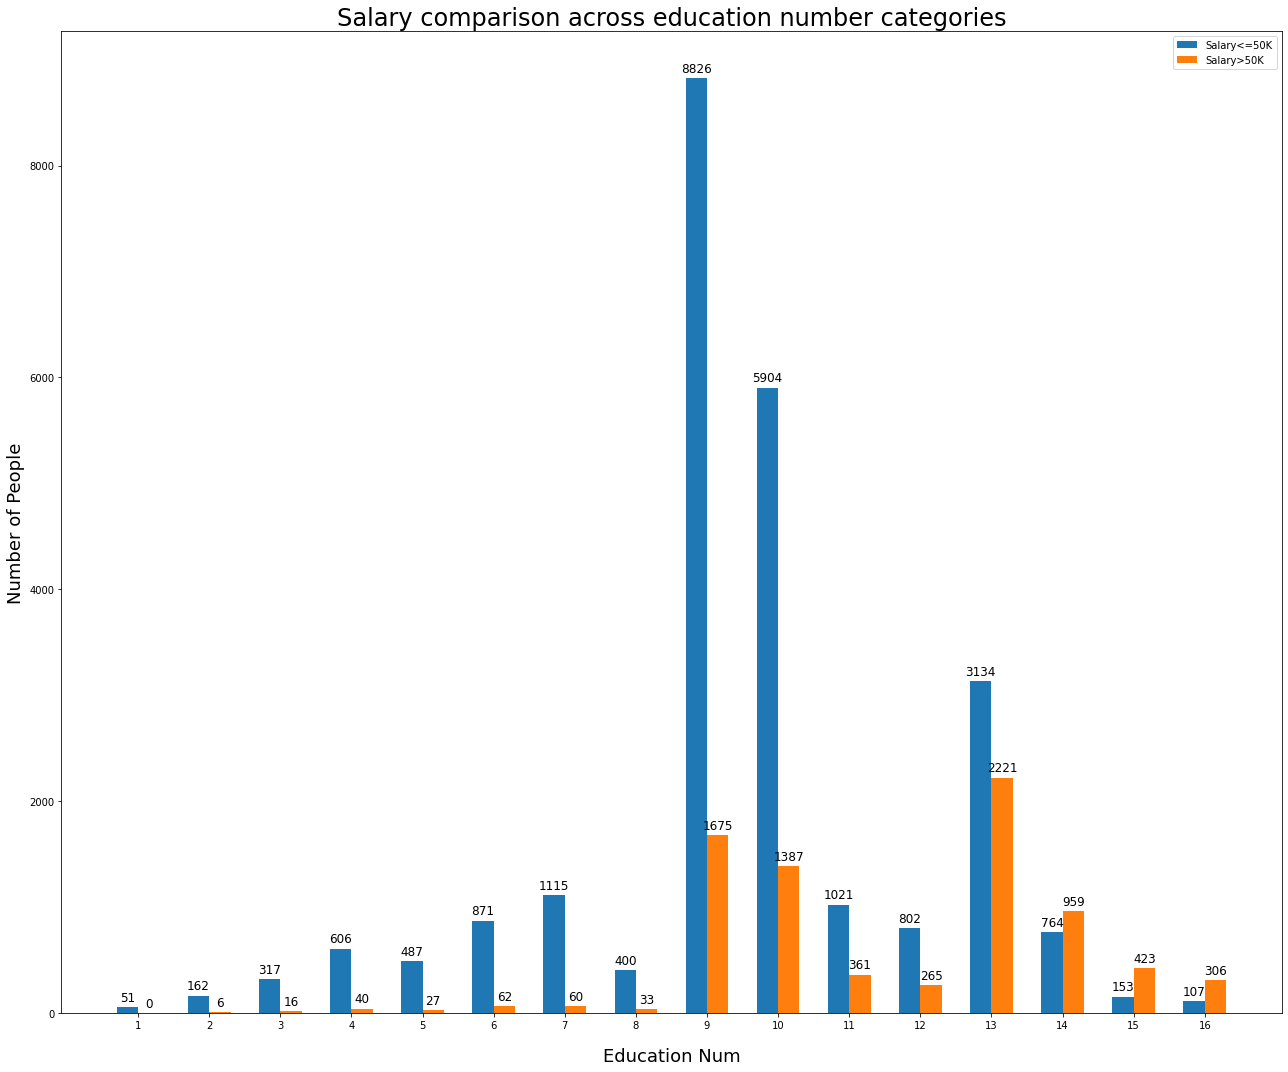

In [225]:
#stacked bar chart for each education category vs (Salary <=50k, Salary>50k)
labels = [x for x in educationNumSalaryComplementaryValues.keys()]
salNumLessThanFifty = [x for x in educationNumSalaryValues.values()]
salNumMoreThanFifty = [x for x in educationNumSalaryComplementaryValues.values()]

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(18, 15))
rects1 = ax.bar(x - width/2, salNumLessThanFifty, width, label='Salary<=50K')
rects2 = ax.bar(x + width/2, salNumMoreThanFifty, width, label='Salary>50K')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Education Num', fontsize=18, labelpad=17)
ax.set_ylabel('Number of People', fontsize=18)
ax.set_title('Salary comparison across education number categories', fontsize=24)
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3, fontsize=12)
ax.bar_label(rects2, padding=3, fontsize=12)

fig.tight_layout()

plt.show()

              Preschool   1  1st-4th   2  5th-6th   3  7th-8th   4  9th   5  \
Preschool           NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
1                   NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
1st-4th             NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
2                   NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
5th-6th             NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
3                   NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
7th-8th             NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
4                   NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
9th                 NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
5                   NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
10th                NaN NaN      NaN NaN      NaN NaN      NaN NaN  NaN NaN   
6                   NaN NaN      NaN NaN      NaN Na

/Users/pranayboggarapu/Assignments/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/pranayboggarapu/Assignments/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

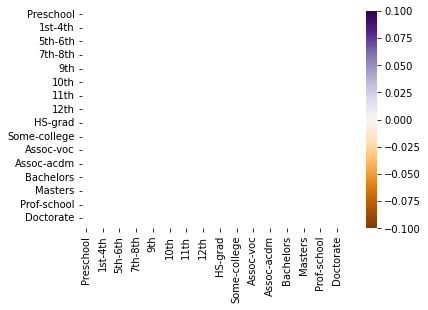

In [295]:
educationNameValues = [x for x in educationSalaryComplementaryValues.keys()]
educationNumberedValues = [x for x in educationNumSalaryComplementaryValues.keys()]
zippedEducationValues = []
for x in zip(educationNameValues,educationNumberedValues):
    zippedEducationValues.append(x[0])
    zippedEducationValues.append(str(x[1]))
zippedSalLessThanFiftyValues = []
salLessThanFiftyNameValues = [x for x in educationSalaryValues.values()]
salNumLessThanFiftyNumValues = [x for x in educationNumSalaryValues.values()]
for x in zip(salLessThanFiftyNameValues,salNumLessThanFiftyNumValues):
    zippedSalLessThanFiftyValues.append(x[0])
    zippedSalLessThanFiftyValues.append(x[1])
zippedSalMoreThanFiftyValues = []
salMoreThanFiftyNameValue = [x for x in educationSalaryComplementaryValues.values()]
salNumMoreThanFiftyNumValues = [x for x in educationNumSalaryComplementaryValues.values()]
for x in zip(salMoreThanFiftyNameValue,salNumMoreThanFiftyNumValues):
    zippedSalMoreThanFiftyValues.append(x[0])
    zippedSalMoreThanFiftyValues.append(x[1])

dataFrame = pd.DataFrame([zippedSalMoreThanFiftyValues], columns=zippedEducationValues)
corr_matrix=dataFrame.corr()
print(corr_matrix)
sb.heatmap(corr_matrix, cmap='PuOr')

Text(0.5, 1.0, 'Education Category vs Salary More Than Fifty Thousand')

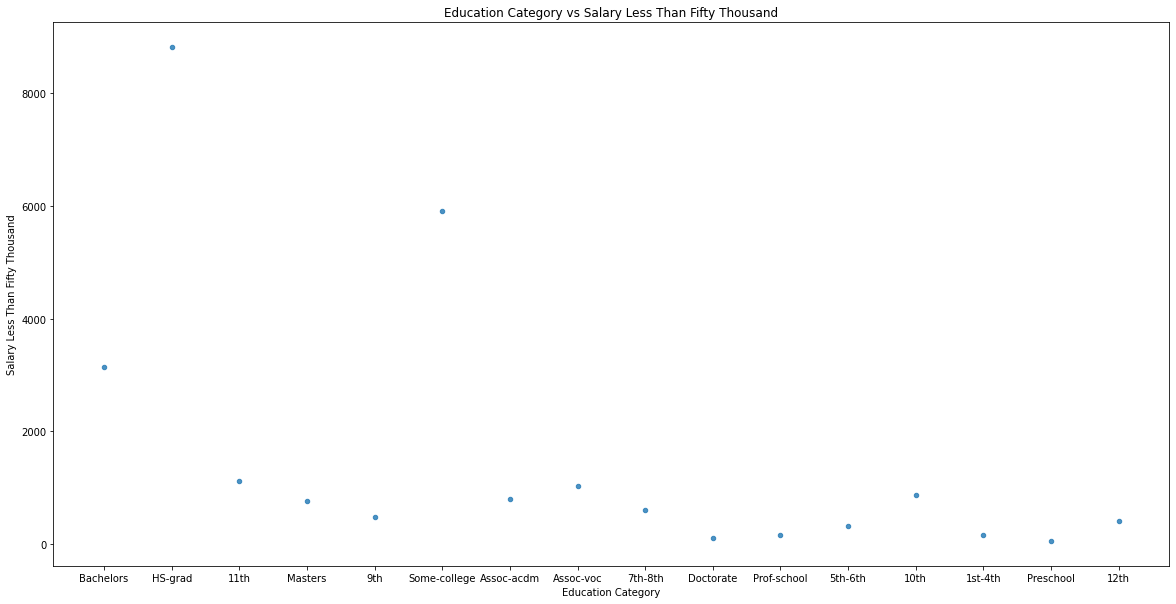

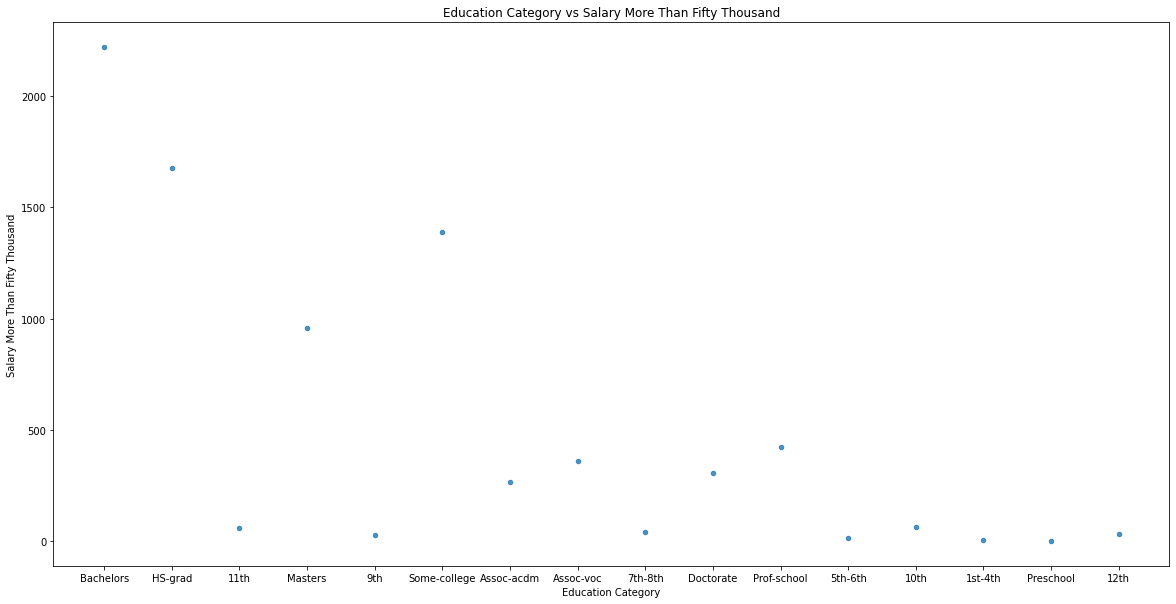

In [185]:
#scatter plot to see if we can derive anything
dataFrame = pd.DataFrame({
    'Education Category': [x for x in educationSalaryComplementaryValues.keys()],
    'Salary Less Than Fifty Thousand': salLessThanFifty,
    'Salary More Than Fifty Thousand': salMoreThanFifty,
})
dy1 = dataFrame.plot.scatter(x='Education Category', y='Salary Less Than Fifty Thousand', alpha=0.8, figsize=(20,10))
dy1.set_title('Education Category vs Salary Less Than Fifty Thousand')
dy2 = dataFrame.plot.scatter(x='Education Category', y='Salary More Than Fifty Thousand', alpha=0.8, figsize=(20,10))
dy2.set_title('Education Category vs Salary More Than Fifty Thousand')

Text(0.5, 1.0, 'Education Category vs Salary More Than Fifty Thousand')

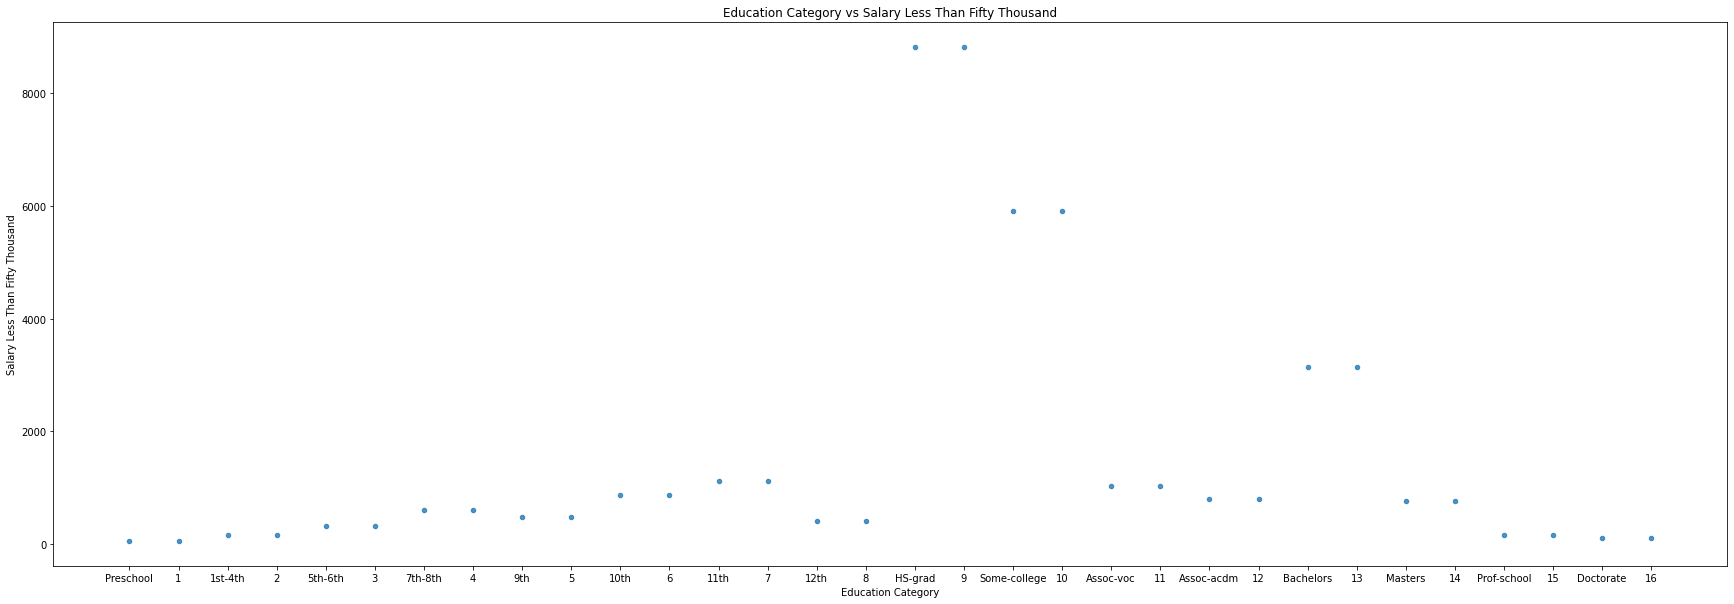

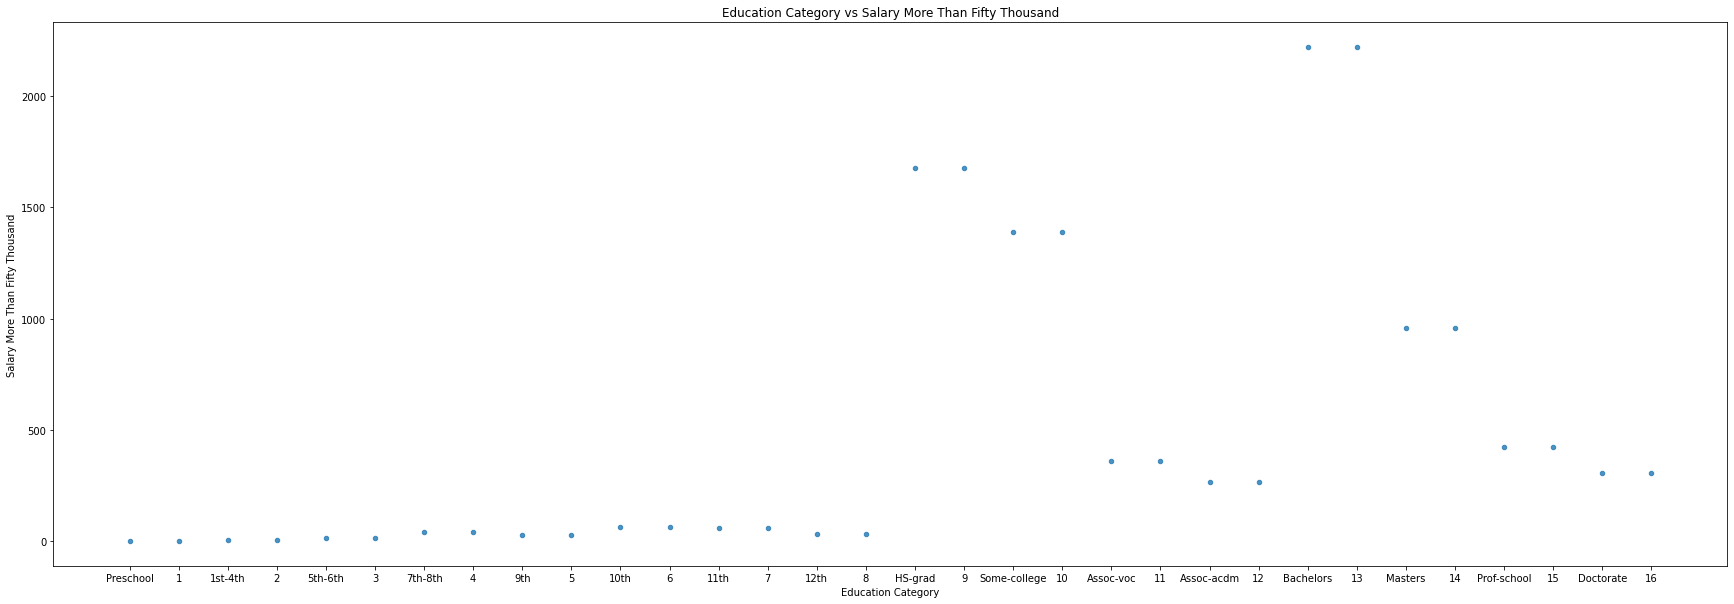

In [299]:
educationNameValues = [x for x in educationSalaryComplementaryValues.keys()]
educationNumberedValues = [x for x in educationNumSalaryComplementaryValues.keys()]
zippedEducationValues = []
for x in zip(educationNameValues,educationNumberedValues):
    zippedEducationValues.append(x[0])
    zippedEducationValues.append(str(x[1]))
zippedSalLessThanFiftyValues = []
salLessThanFiftyNameValues = [x for x in educationSalaryValues.values()]
salNumLessThanFiftyNumValues = [x for x in educationNumSalaryValues.values()]
for x in zip(salLessThanFiftyNameValues,salNumLessThanFiftyNumValues):
    zippedSalLessThanFiftyValues.append(x[0])
    zippedSalLessThanFiftyValues.append(x[1])
zippedSalMoreThanFiftyValues = []
salMoreThanFiftyNameValue = [x for x in educationSalaryComplementaryValues.values()]
salNumMoreThanFiftyNumValues = [x for x in educationNumSalaryComplementaryValues.values()]
for x in zip(salMoreThanFiftyNameValue,salNumMoreThanFiftyNumValues):
    zippedSalMoreThanFiftyValues.append(x[0])
    zippedSalMoreThanFiftyValues.append(x[1])
dataFrame = pd.DataFrame({
    'Education Category': zippedEducationValues,
    'Salary Less Than Fifty Thousand': zippedSalLessThanFiftyValues,
    'Salary More Than Fifty Thousand': zippedSalMoreThanFiftyValues,
})
dy1 = dataFrame.plot.scatter(x='Education Category', y='Salary Less Than Fifty Thousand', alpha=0.8, figsize=(30,10))
dy1.set_title('Education Category vs Salary Less Than Fifty Thousand')
dy2 = dataFrame.plot.scatter(x='Education Category', y='Salary More Than Fifty Thousand', alpha=0.8, figsize=(30,10))
dy2.set_title('Education Category vs Salary More Than Fifty Thousand')

685.0
685.0


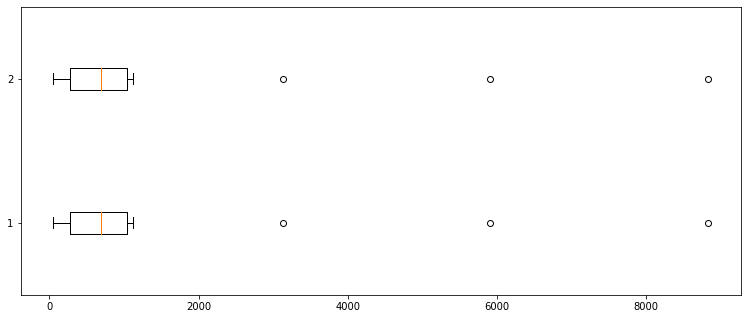

In [303]:


salLessThanFiftyNameValues = [x for x in educationSalaryValues.values()]
salNumLessThanFiftyNumValues = [x for x in educationNumSalaryValues.values()]

print(np.nanmedian(salLessThanFiftyNameValues))
print(np.nanmedian(salNumLessThanFiftyNumValues))

fig = plt.figure(figsize =(10, 4))

 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot([salLessThanFiftyNameValues, salNumLessThanFiftyNumValues], vert=False)
 
# show plot
plt.show()

163.5
163.5


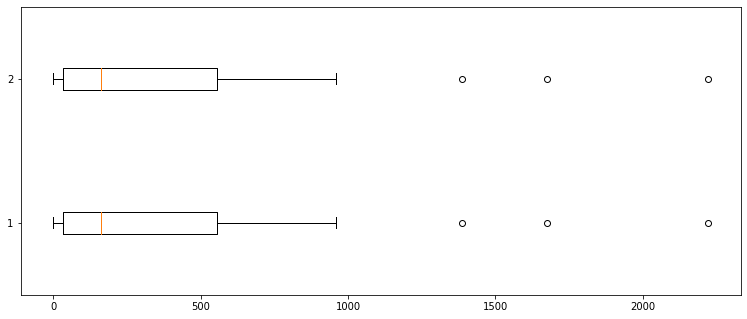

In [304]:
salMoreThanFiftyNameValue = [x for x in educationSalaryComplementaryValues.values()]
salNumMoreThanFiftyNumValues = [x for x in educationNumSalaryComplementaryValues.values()]

print(np.nanmedian(salMoreThanFiftyNameValue))
print(np.nanmedian(salNumMoreThanFiftyNumValues))

fig = plt.figure(figsize =(10, 4))

 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot([salMoreThanFiftyNameValue, salNumMoreThanFiftyNumValues], vert=False)
 
# show plot
plt.show()

['Bachelors', 13, 'HS-grad', 9, '11th', 7, 'Masters', 14, '9th', 5, 'Some-college', 10, 'Assoc-acdm', 12, 'Assoc-voc', 11, '7th-8th', 4, 'Doctorate', 16, 'Prof-school', 15, '5th-6th', 3, '10th', 6, '1st-4th', 2, 'Preschool', 1, '12th', 8]


<AxesSubplot:>

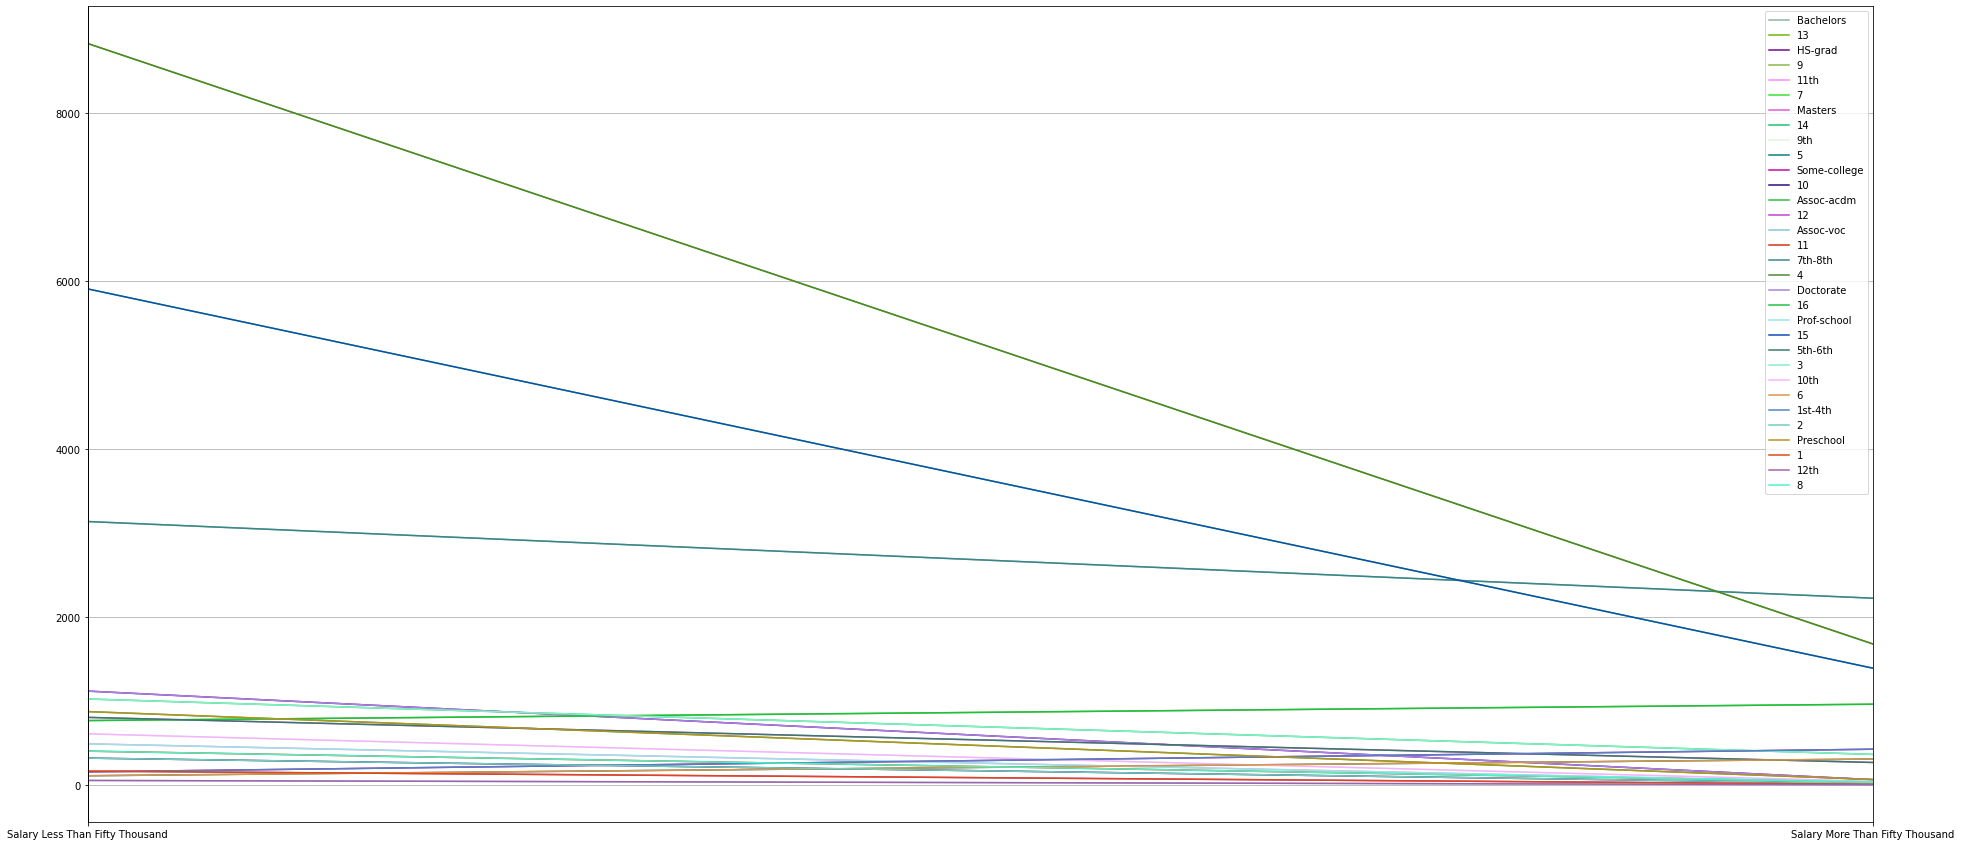

In [186]:
#parallel plot to check the relation between education category and education num
listValues = []
for x,y in zip(educationSalaryComplementaryValues.keys(), educationNumSalaryComplementaryValues.keys()):
    listValues.append(x)
    listValues.append(y)
print(listValues)
combinedDataFrame = pd.DataFrame({
    'Education Category': listValues,
    'Salary Less Than Fifty Thousand': salLessThanFifty+salNumLessThanFifty,
    'Salary More Than Fifty Thousand': salMoreThanFifty+salNumMoreThanFifty,
})
plt.figure(figsize=(32,15))
pd.plotting.parallel_coordinates(combinedDataFrame, 'Education Category')

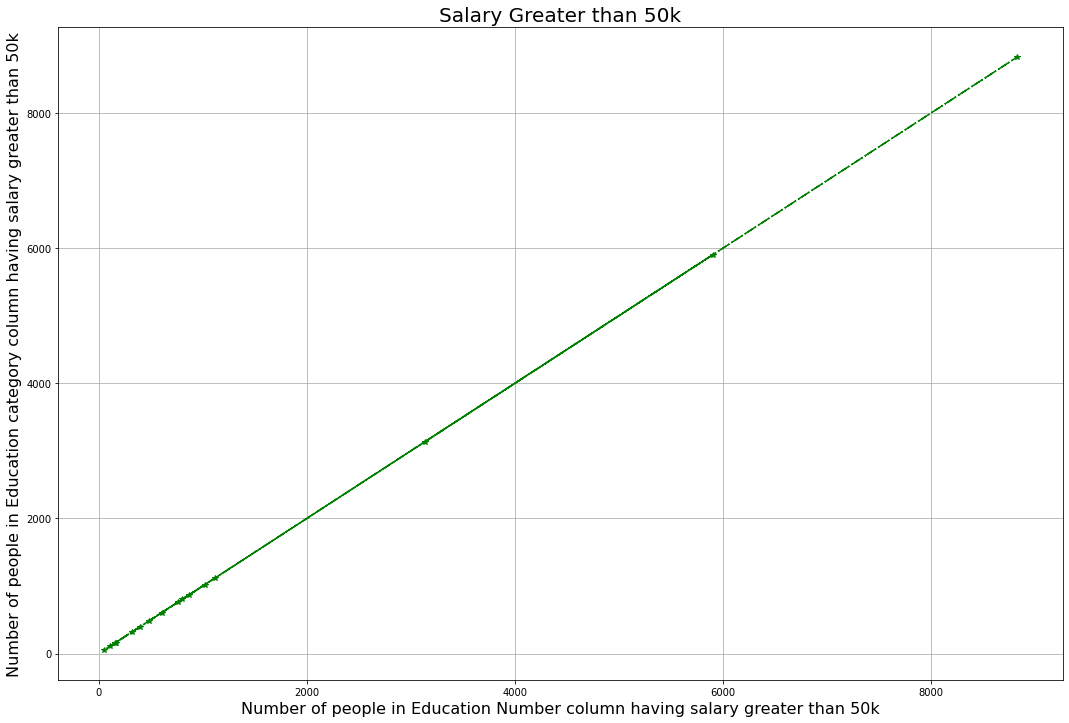

In [187]:
#line chart to say that both education and education num are same. sal greater than 50k
plt.plot(educationNumSalaryValues.values(), educationSalaryValues.values(), linestyle='-.', marker='*', color='g')
plt.title('Salary Greater than 50k', fontsize=20)
plt.xlabel('Number of people in Education Number column having salary greater than 50k', fontsize = 16)
plt.ylabel('Number of people in Education category column having salary greater than 50k', fontsize = 16)
plt.grid(True)

#to show the legend/scale
f = plt.gcf()
fig_width, fig_height = f.get_size_inches()
f.set_figwidth(fig_width*3)
f.set_figheight(fig_height*3)

plt.show()

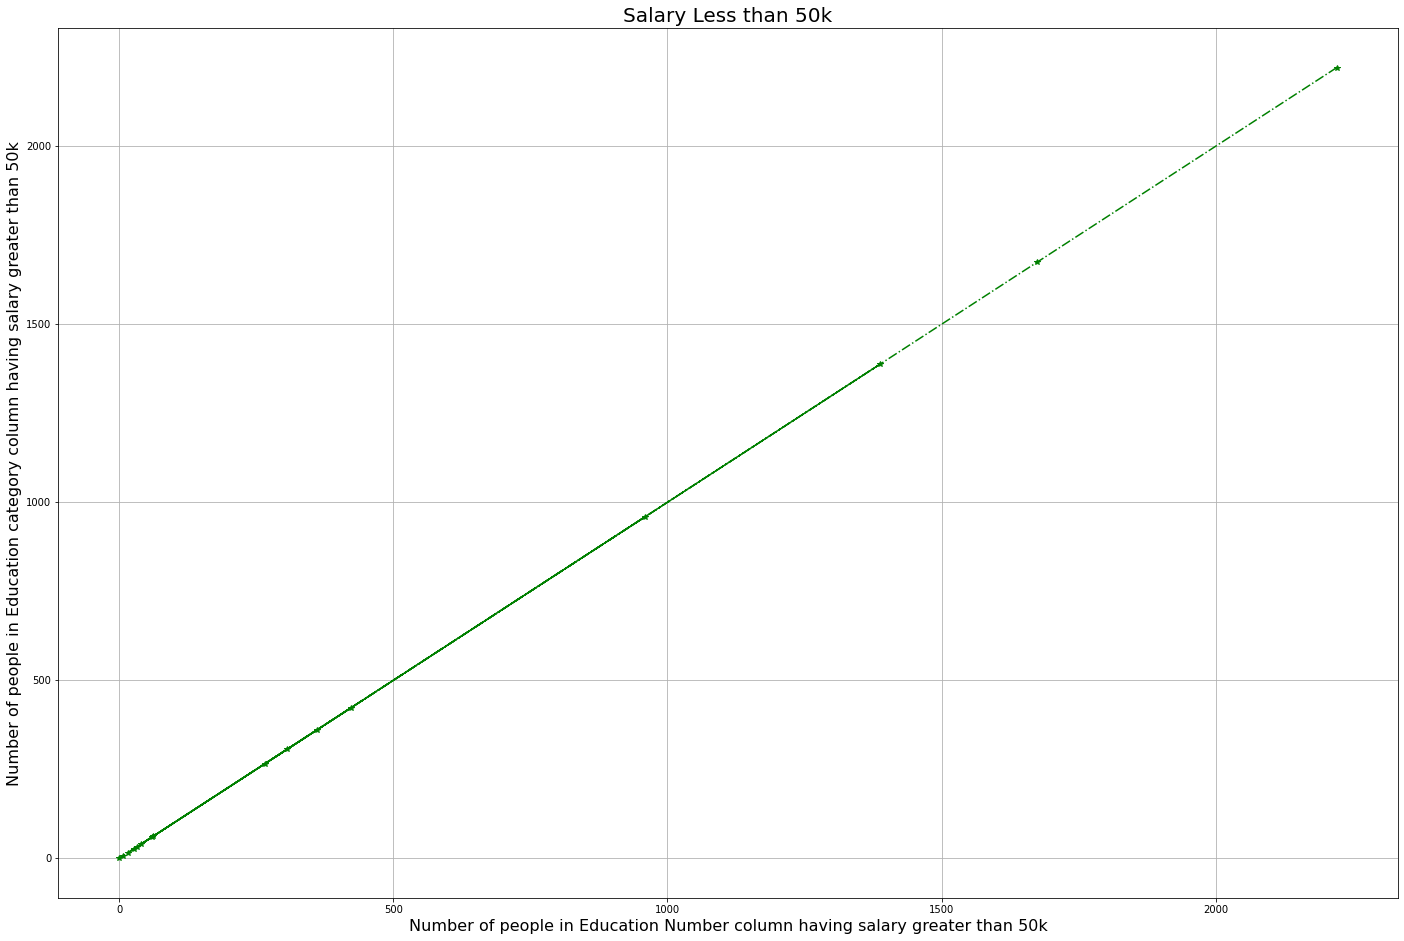

In [188]:
#line chart to say that both education and education num are same. sal less than 50k
plt.plot(educationNumSalaryComplementaryValues.values(), educationSalaryComplementaryValues.values(), linestyle='-.', marker='*', color='g')
plt.title('Salary Less than 50k', fontsize=20)
plt.xlabel('Number of people in Education Number column having salary greater than 50k', fontsize = 16)
plt.ylabel('Number of people in Education category column having salary greater than 50k', fontsize = 16)
plt.grid(True)

#to show the legend/scale
f = plt.gcf()
fig_width, fig_height = f.get_size_inches()
f.set_figwidth(fig_width*4)
f.set_figheight(fig_height*4)

plt.show()

Text(0.5, 1.0, 'Capital Gain vs Salary More Than Fifty Thousand')

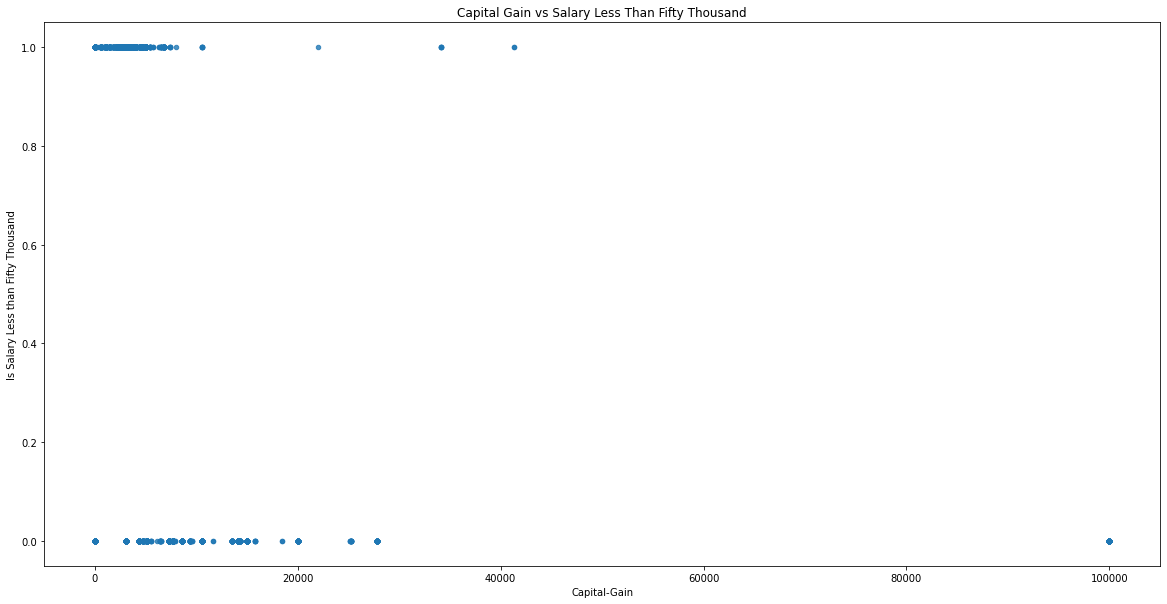

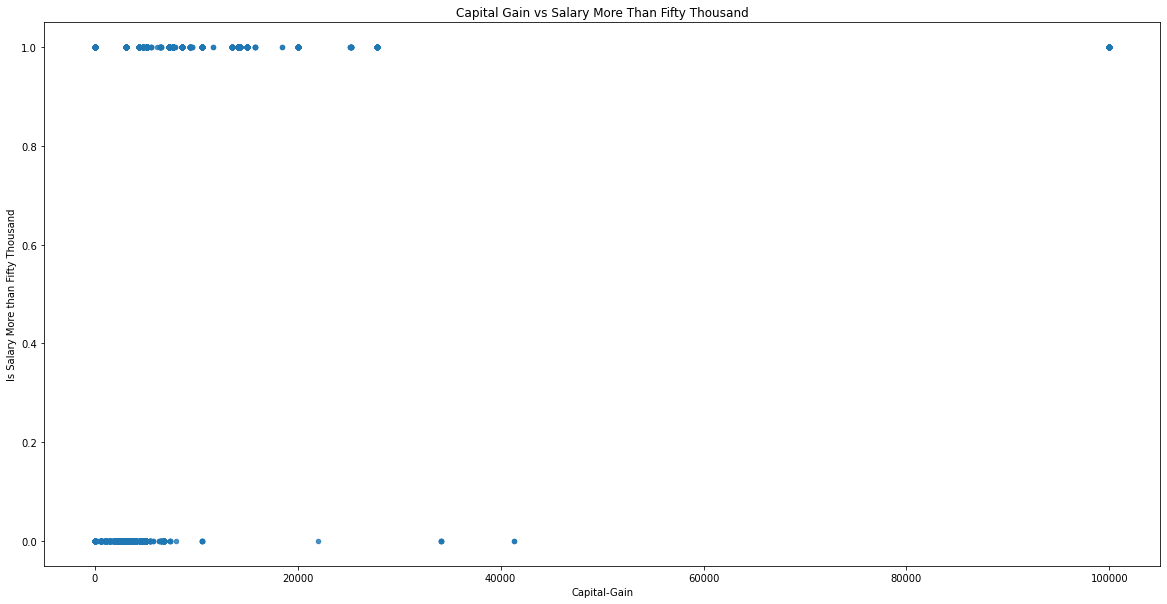

In [189]:
#scatter plot to show that there exists no relationship between capital gain and sal value
dataFrame = pd.DataFrame({
    ColumnNames.CapitalGain.value: list(actualDataFrame[ColumnNames.CapitalGain.value]),
    ColumnNames.SalaryLessThanFifty.value: [1 if booleanValue==True else 0 for booleanValue in actualDataFrame[ColumnNames.SalaryLessThanFifty.value]],
    ColumnNames.SalaryMoreThanFifty.value: [1 if booleanValue==True else 0 for booleanValue in actualDataFrame[ColumnNames.SalaryMoreThanFifty.value]],
})

dy1 = dataFrame.plot.scatter(x=ColumnNames.CapitalGain.value, y=ColumnNames.SalaryLessThanFifty.value, alpha=0.8, figsize=(20,10))
dy1.set_title('Capital Gain vs Salary Less Than Fifty Thousand')
dy2 = dataFrame.plot.scatter(x=ColumnNames.CapitalGain.value, y=ColumnNames.SalaryMoreThanFifty.value, alpha=0.8, figsize=(20,10))
dy2.set_title('Capital Gain vs Salary More Than Fifty Thousand')


Text(0.5, 1.0, 'Capital Gain vs Salary More Than Fifty Thousand')

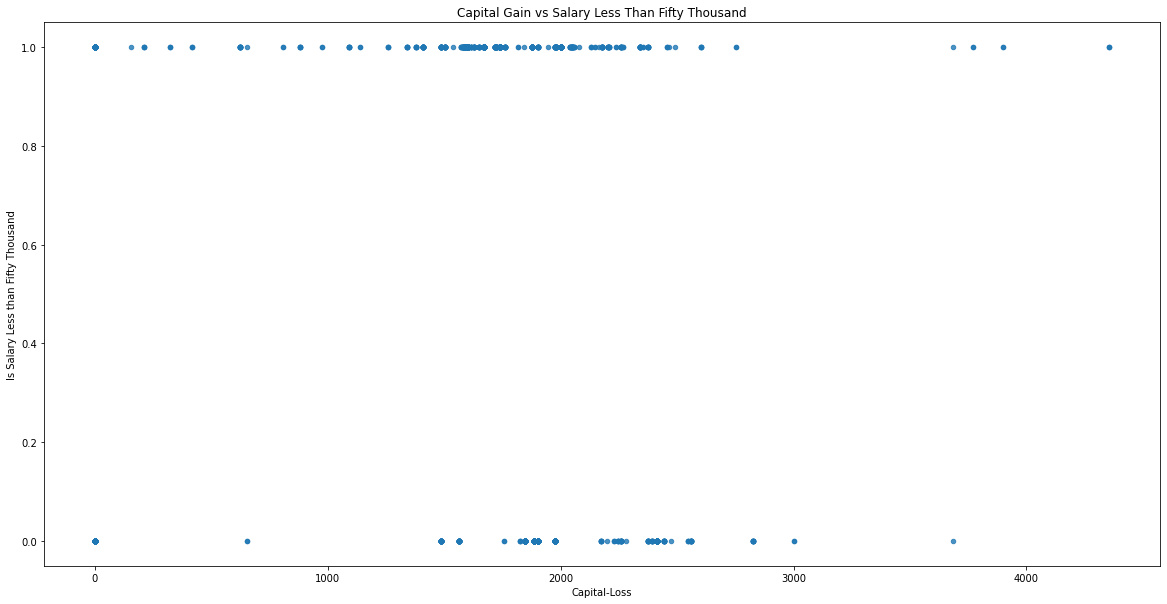

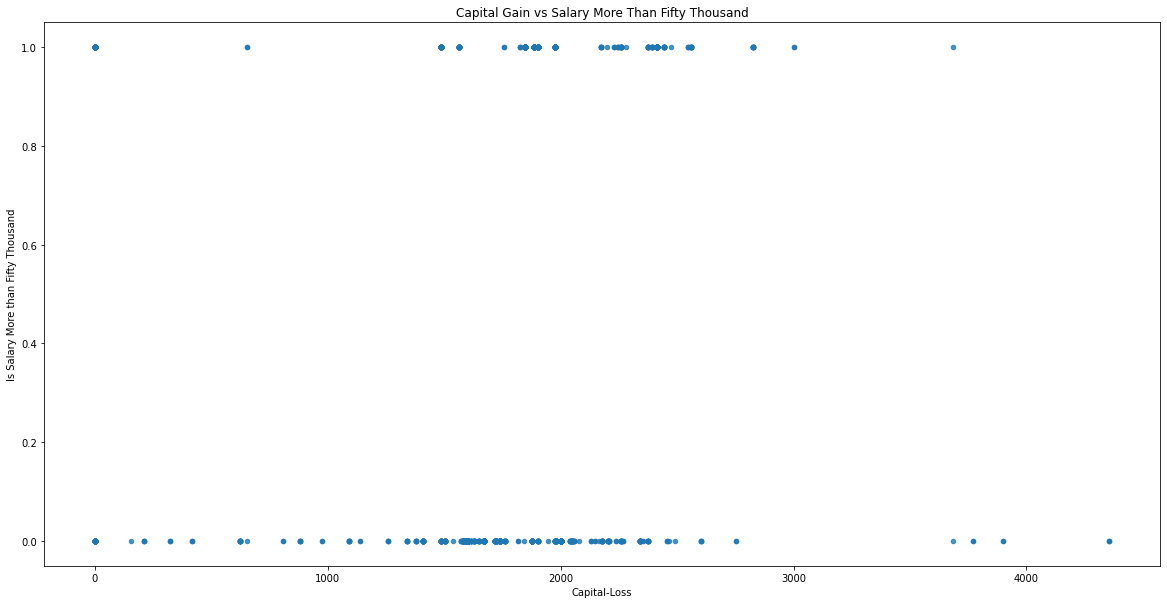

In [190]:
#scatter plot to show that there exists no relationship between capital gain and sal value
dataFrame = pd.DataFrame({
    ColumnNames.CapitalLoss.value: list(actualDataFrame[ColumnNames.CapitalLoss.value]),
    ColumnNames.SalaryLessThanFifty.value: [1 if booleanValue==True else 0 for booleanValue in actualDataFrame[ColumnNames.SalaryLessThanFifty.value]],
    ColumnNames.SalaryMoreThanFifty.value: [1 if booleanValue==True else 0 for booleanValue in actualDataFrame[ColumnNames.SalaryMoreThanFifty.value]],
})

dy1 = dataFrame.plot.scatter(x=ColumnNames.CapitalLoss.value, y=ColumnNames.SalaryLessThanFifty.value, alpha=0.8, figsize=(20,10))
dy1.set_title('Capital Gain vs Salary Less Than Fifty Thousand')
dy2 = dataFrame.plot.scatter(x=ColumnNames.CapitalLoss.value, y=ColumnNames.SalaryMoreThanFifty.value, alpha=0.8, figsize=(20,10))
dy2.set_title('Capital Gain vs Salary More Than Fifty Thousand')

Text(0.5, 1.0, 'Capital Gain vs Capital Loss')

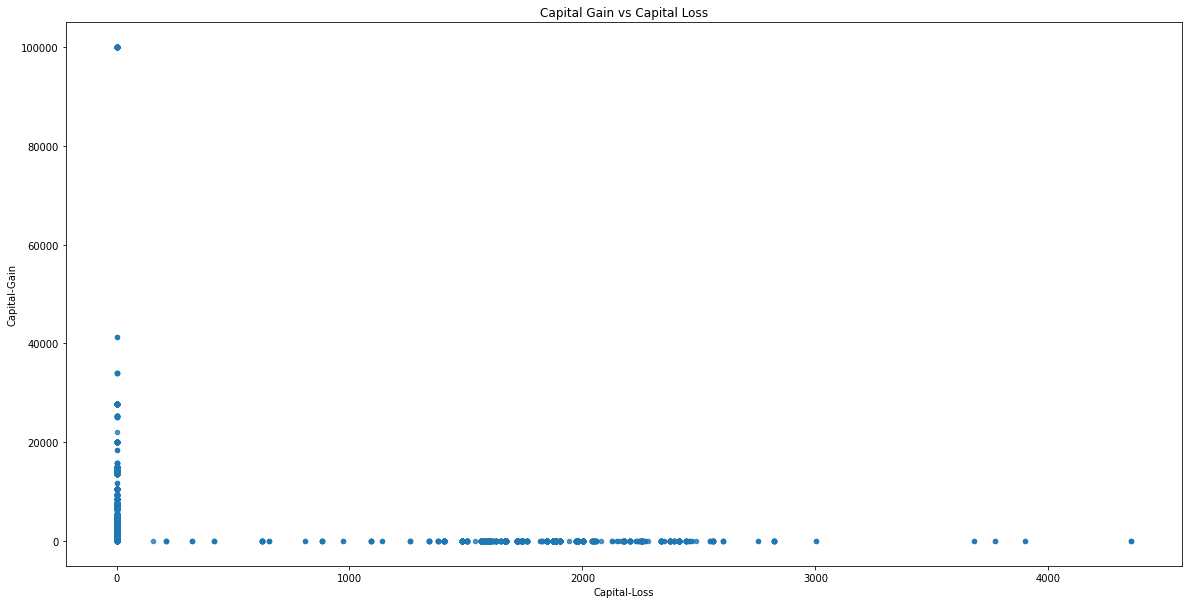

In [191]:
#scatter plot to indicate capital loss vs capital gain
dataFrame = pd.DataFrame({
    ColumnNames.CapitalLoss.value: list(actualDataFrame[ColumnNames.CapitalLoss.value]),
    ColumnNames.CapitalGain.value: list(actualDataFrame[ColumnNames.CapitalGain.value])
})

dy1 = dataFrame.plot.scatter(x=ColumnNames.CapitalLoss.value, y=ColumnNames.CapitalGain.value, alpha=0.8, figsize=(20,10))
dy1.set_title('Capital Gain vs Capital Loss')

7298.0


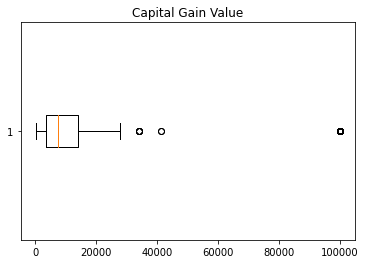

In [192]:
# Box plot to indicate the skewness/degree of dispersion in Capital Gain data
plt.boxplot(x=actualDataFrame[actualDataFrame[ColumnNames.CapitalGain.value] != 0][ColumnNames.CapitalGain.value],vert=False)
print(np.nanmedian(actualDataFrame[actualDataFrame[ColumnNames.CapitalGain.value] != 0][ColumnNames.CapitalGain.value]))
plt.title('Capital Gain Value')
plt.show()


1887.0


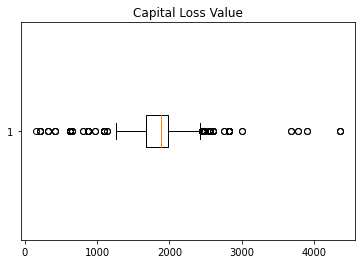

In [193]:
# Box plot to indicate the skewness/degree of dispersion in Capital Loss data
plt.boxplot(x=actualDataFrame[actualDataFrame[ColumnNames.CapitalLoss.value] != 0][ColumnNames.CapitalLoss.value],vert=False)
print(np.nanmedian(actualDataFrame[actualDataFrame[ColumnNames.CapitalLoss.value] != 0][ColumnNames.CapitalLoss.value]))
plt.title('Capital Loss Value')
plt.show()

1887.0


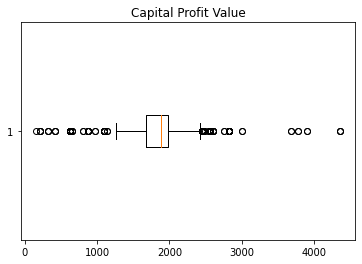

In [194]:
data = list(map(lambda x: x[0]-x[1], zip(actualDataFrame[actualDataFrame[ColumnNames.CapitalGain.value] != 0][ColumnNames.CapitalGain.value], actualDataFrame[actualDataFrame[ColumnNames.CapitalLoss.value] != 0][ColumnNames.CapitalLoss.value])))
plt.boxplot(x=actualDataFrame[actualDataFrame[ColumnNames.CapitalLoss.value] != 0][ColumnNames.CapitalLoss.value],vert=False)
print(np.nanmedian(actualDataFrame[actualDataFrame[ColumnNames.CapitalLoss.value] != 0][ColumnNames.CapitalLoss.value]))
plt.title('Capital Profit Value')
plt.show()

In [195]:
sampleLessLossData = actualDataFrame[actualDataFrame[ColumnNames.SalaryLessThanFifty.value] == True]
lossLessData = sampleLessLossData[sampleLessLossData[ColumnNames.CapitalLoss.value] != 0][ColumnNames.CapitalLoss.value]
anotherSampleMoreLossData = actualDataFrame[actualDataFrame[ColumnNames.SalaryMoreThanFifty.value] == True]
lossMoreData = anotherSampleMoreLossData[anotherSampleMoreLossData[ColumnNames.CapitalLoss.value] != 0][ColumnNames.CapitalLoss.value]

1760.9825737265417
438.61189274541914


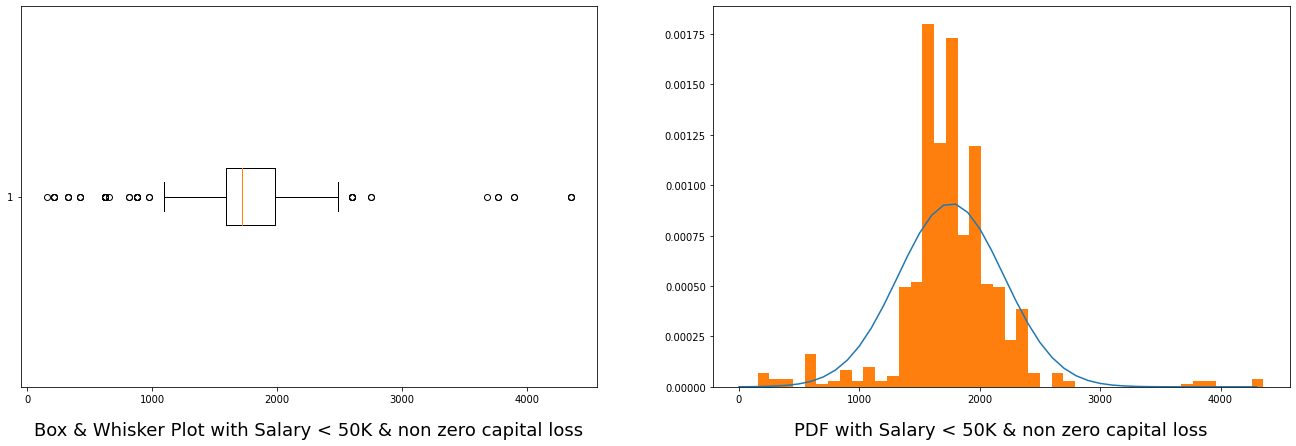

In [207]:
# Probability density line 
mean = np.nanmean(lossLessData)
standardDeviation = np.nanstd(lossLessData)
print(mean)
print(standardDeviation)
dist = norm(mean,standardDeviation)
numberOfBins = math.ceil((max(lossLessData)-min(lossLessData))/100)
values = [value for value in range(0,max(lossLessData),100)]
probabilities = [dist.pdf(value) for value in values]

fig = plt.figure(figsize =(3, 7))                  # Changed the size of the figure, just aesthetic
ax1 = fig.add_subplot(1,2,1)     # Change the subplot arguments
ax1.boxplot(x=lossLessData,vert=False)
ax1.set_xlabel('Box & Whisker Plot with Salary < 50K & non zero capital loss', fontsize=18, labelpad=17)
ax2 = fig.add_subplot(1,2,2)                        # Change the subplot arguments
ax2.plot(values,probabilities)
ax2.hist(lossLessData,bins=numberOfBins,density=True)
ax2.set_xlabel('PDF with Salary < 50K & non zero capital loss', fontsize=18, labelpad=17)
#ax2.plot(values,probabilities)
plt.subplots_adjust(left=None, bottom=None, right=6.0, top=None, wspace=None, hspace=None)
plt.show()

1978.0168175937904
263.97273071895677


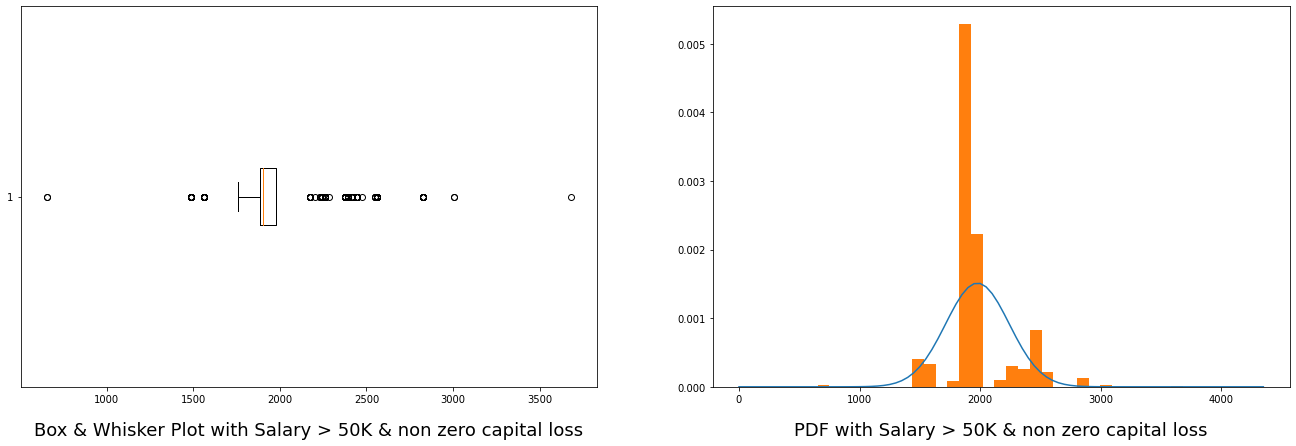

In [208]:
# Probability density line 
mean = np.nanmean(lossMoreData)
standardDeviation = np.nanstd(lossMoreData)
print(mean)
print(standardDeviation)
dist = norm(mean,standardDeviation)
numberOfBins = math.ceil((max(lossMoreData)-min(lossMoreData))/100)
values = [value for value in range(0,max(lossLessData),50)]
probabilities = [dist.pdf(value) for value in values]

fig = plt.figure(figsize =(3, 7))                  # Changed the size of the figure, just aesthetic
ax1 = fig.add_subplot(1,2,1)     # Change the subplot arguments
ax1.boxplot(x=lossMoreData,vert=False)
ax1.set_xlabel('Box & Whisker Plot with Salary > 50K & non zero capital loss', fontsize=18, labelpad=17)
ax2 = fig.add_subplot(1,2,2)                        # Change the subplot arguments
ax2.plot(values,probabilities)
ax2.hist(lossMoreData,bins=numberOfBins,density=True)
ax2.set_xlabel('PDF with Salary > 50K & non zero capital loss', fontsize=18, labelpad=17)
#ax2.plot(values,probabilities)
plt.subplots_adjust(left=None, bottom=None, right=6.0, top=None, wspace=None, hspace=None)
plt.show()

1721.0
1902.0


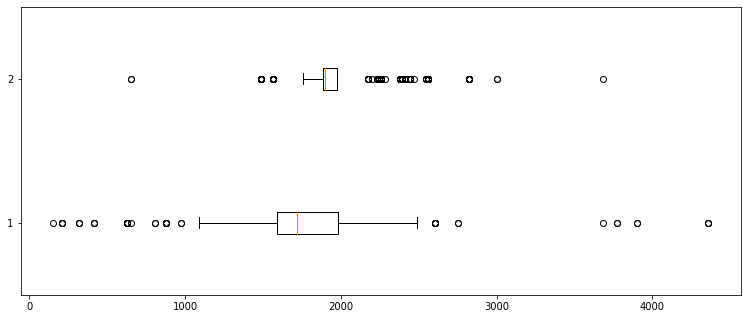

In [198]:
print(np.nanmedian(lossLessData))
print(np.nanmedian(lossMoreData))

data = [lossLessData, lossMoreData]
fig = plt.figure(figsize =(10, 4))

 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, vert=False)
 
# show plot
plt.show()

In [199]:
sampleLessGainData = actualDataFrame[actualDataFrame[ColumnNames.SalaryLessThanFifty.value] == True]
lessGainData = sampleLessGainData[sampleLessGainData[ColumnNames.CapitalGain.value] != 0][ColumnNames.CapitalGain.value]
sampleMoreGainData = actualDataFrame[actualDataFrame[ColumnNames.SalaryMoreThanFifty.value] == True]
moreGainData = sampleMoreGainData[sampleMoreGainData[ColumnNames.CapitalGain.value] != 0][ColumnNames.CapitalGain.value]

3171.885863953575
3273.0


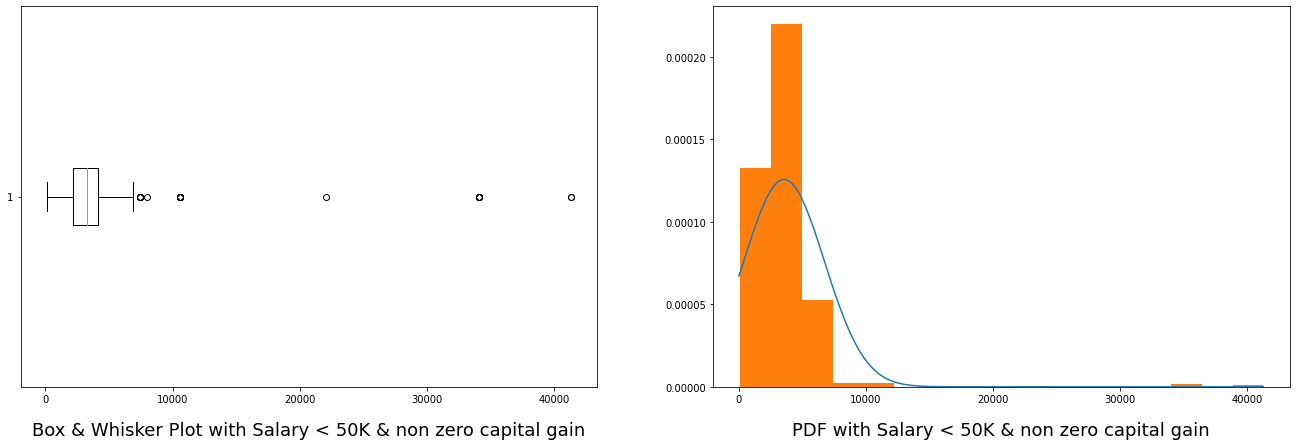

In [216]:
# Probability density line 
mean = np.nanmean(lessGainData)
standardDeviation = np.nanstd(lessGainData)
print(standardDeviation)
print(np.nanmedian(lessGainData))
dist = norm(mean,standardDeviation)
#numberOfBins = math.ceil(len(lessGainData)/20)
numberOfBins = math.ceil((max(lessGainData)-min(lessGainData))/2500)
values = [value for value in range(0,max(lessGainData),350)]
probabilities = [dist.pdf(value) for value in values]

fig = plt.figure(figsize =(3, 7))                  # Changed the size of the figure, just aesthetic
ax1 = fig.add_subplot(1,2,1)     # Change the subplot arguments
ax1.boxplot(x=lessGainData,vert=False)
ax1.set_xlabel('Box & Whisker Plot with Salary < 50K & non zero capital gain', fontsize=18, labelpad=17)
ax2 = fig.add_subplot(1,2,2)                        # Change the subplot arguments
ax2.plot(values,probabilities)
ax2.hist(lessGainData,bins=numberOfBins,density=True)
ax2.set_xlabel('PDF with Salary < 50K & non zero capital gain', fontsize=18, labelpad=17)
#ax2.plot(values,probabilities)
plt.subplots_adjust(left=None, bottom=None, right=6.0, top=None, wspace=None, hspace=None)
plt.show()

26770.690773725477
7896.0


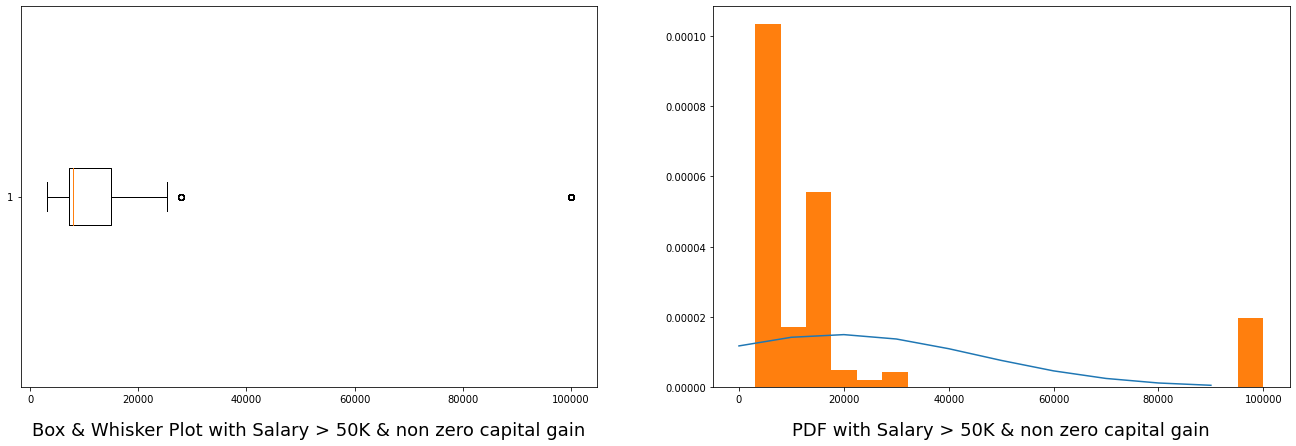

In [215]:
#Probability density line of salary > 50K & non zero capital gain 
mean = np.nanmean(moreGainData)
standardDeviation = np.nanstd(moreGainData)
print(standardDeviation)
print(np.nanmedian(moreGainData))
dist = norm(mean,standardDeviation)
#numberOfBins = math.ceil(len(lessGainData)/20)
numberOfBins = math.ceil((max(moreGainData)-min(moreGainData))/5000)
values = [value for value in range(0,max(moreGainData),10000)]
probabilities = [dist.pdf(value) for value in values]

fig = plt.figure(figsize =(3, 7))                  # Changed the size of the figure, just aesthetic
ax1 = fig.add_subplot(1,2,1)     # Change the subplot arguments
ax1.boxplot(x=moreGainData,vert=False)
ax1.set_xlabel('Box & Whisker Plot with Salary > 50K & non zero capital gain', fontsize=18, labelpad=17)
ax2 = fig.add_subplot(1,2,2)                        # Change the subplot arguments
ax2.plot(values,probabilities)
ax2.hist(moreGainData,bins=numberOfBins,density=True)
ax2.set_xlabel('PDF with Salary > 50K & non zero capital gain', fontsize=18, labelpad=17)
#ax2.plot(values,probabilities)
plt.subplots_adjust(left=None, bottom=None, right=6.0, top=None, wspace=None, hspace=None)
plt.show()

3273.0
7896.0


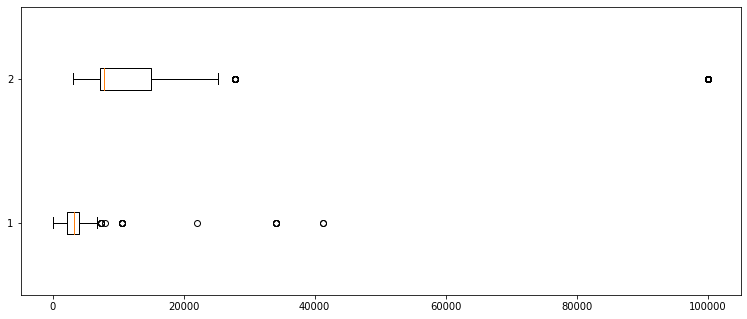

In [202]:
print(np.nanmedian(lessGainData))
print(np.nanmedian(moreGainData))

data = [lessGainData, moreGainData]
fig = plt.figure(figsize =(10, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, vert=False)
 
# show plot
plt.show()

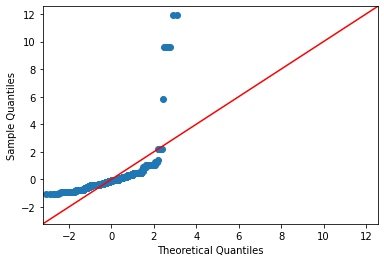

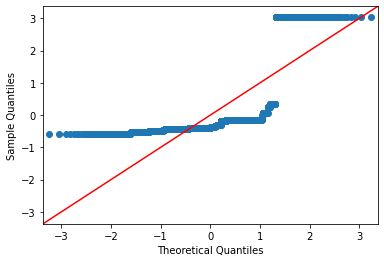

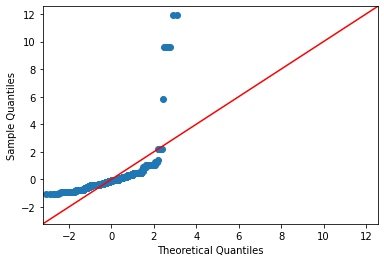

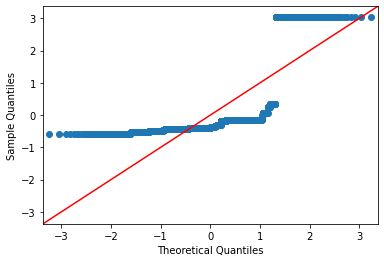

In [203]:
# Q-Q plot
sm.qqplot(lossData, fit=True, line ='45')
sm.qqplot(gainData, fit=True, line ='45')
sm.qqplot(lessGainData, fit=True, line ='45')
sm.qqplot(moreGainData, fit=True, line ='45')

plt.show()

26770.690773725477
18731.16457960644


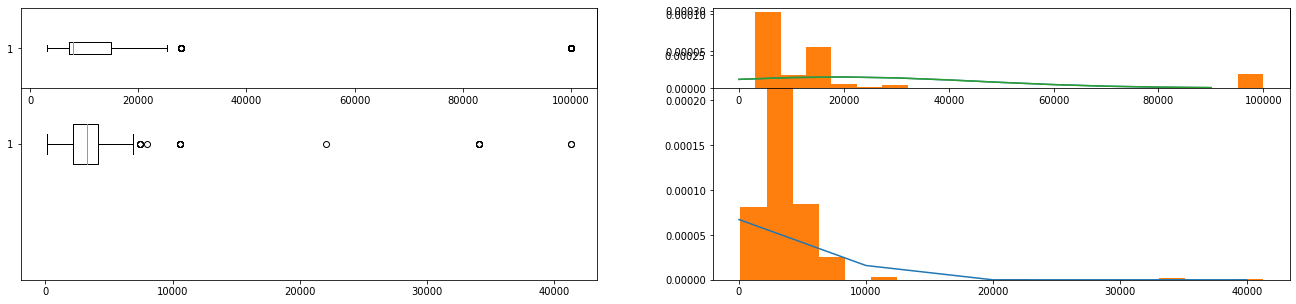

In [204]:
meanMoreGain = np.nanmean(moreGainData)
standardDeviationMoreGain = np.nanstd(moreGainData)
print(standardDeviationMoreGain)
print(np.nanmedian(meanMoreGain))
meanLessGain = np.nanmean(lessGainData)
standardDeviationLessGain = np.nanstd(lessGainData)
distMoreGain = norm(meanMoreGain,standardDeviationMoreGain)
distLessGain = norm(meanLessGain, standardDeviationLessGain)
#numberOfBins = math.ceil(len(lessGainData)/20)
numberOfBins = 20
valuesMoreGain = [value for value in range(0,max(moreGainData),10000)]
valuesLessGain = [value for value in range(0,max(lessGainData),10000)]
probabilitiesMoreGain = [distMoreGain.pdf(value) for value in valuesMoreGain]
probabilitiesLessGain = [distLessGain.pdf(value) for value in valuesLessGain]

fig = plt.figure(figsize =(3, 5))                  # Changed the size of the figure, just aesthetic
ax3 = fig.add_subplot(1,2,1)     # Change the subplot arguments
ax3.boxplot(x=lessGainData,vert=False)
#ax3.set_xlabel('Box & Whisker Plot with Salary > 50K & non zero capital gain', fontsize=18, labelpad=17)
ax4 = fig.add_subplot(1,2,2)                        # Change the subplot arguments
ax4.plot(valuesLessGain,probabilitiesLessGain)
ax4.hist(lessGainData,bins=numberOfBins,density=True)
#ax4.set_xlabel('PDF with Salary > 50K & non zero capital gain', fontsize=18, labelpad=17)
ax1 = fig.add_subplot(3,2,1)     # Change the subplot arguments
ax1.boxplot(x=moreGainData,vert=False)
#ax1.set_xlabel('Box & Whisker Plot with Salary > 50K & non zero capital gain', fontsize=18, labelpad=17)
ax2 = fig.add_subplot(3,2,2)                        # Change the subplot arguments
ax2.plot(valuesMoreGain,probabilitiesMoreGain)
ax2.hist(moreGainData,bins=numberOfBins,density=True)
#ax2.set_xlabel('PDF with Salary > 50K & non zero capital gain', fontsize=18, labelpad=17)
ax2.plot(valuesMoreGain,probabilitiesMoreGain)

plt.subplots_adjust(left=None, bottom=None, right=6.0, top=None, wspace=None, hspace=None)
plt.show()